 Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cybersecurity-ai-in-2022-2023.ipynb to cybersecurity-ai-in-2022-2023.ipynb


 Load the Dataset


In [ ]:
import pandas as pd

# Replace with the path to your actual CSV file
file_path = 'customer_support_data.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)

    # Display basic info and first few rows
    print("Dataset Loaded Successfully!")
    print(f"Number of records: {len(df)}")
    print("\nSample records:\n")
    print(df.head())
except Exception as e:
    print(f"Failed to load dataset: {e}")


Failed to load dataset: [Errno 2] No such file or directory: 'customer_support_data.csv'


 Data Exploration

📝 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       6 non-null      int64 
 1   user_message  6 non-null      object
 2   bot_response  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes
None

📊 Sample Records:
   user_id                     user_message  \
0      101      How do I reset my password?   
1      102            Can I track my order?   
2      103     Do you ship internationally?   
3      104    Where can I find my invoices?   
4      105  The app is crashing on startup!   

                              bot_response  
0     Click on 'Forgot Password' at login.  
1        Yes, go to 'My Orders' > 'Track'.  
2        Yes, we ship to select countries.  
3  Invoices are available in 'My Account'.  
4     Try reinstalling or contact support.  


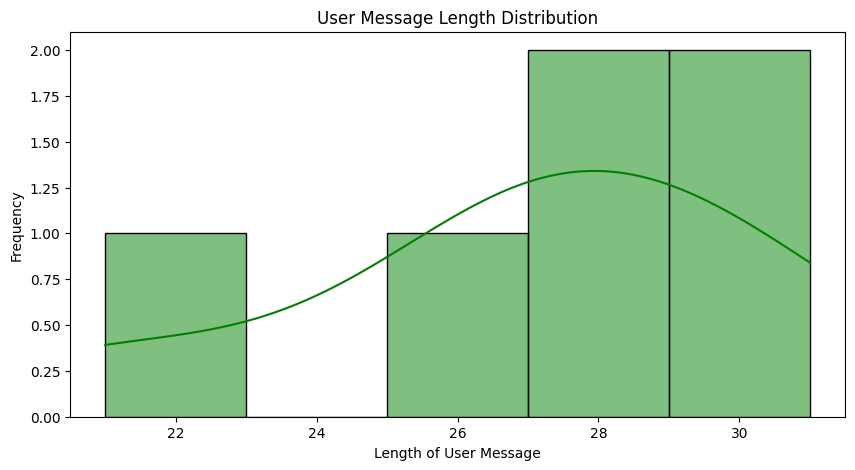

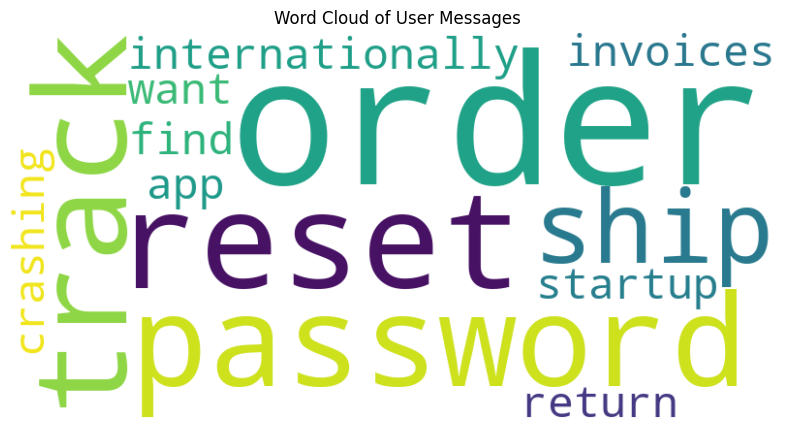


🔠 Top 10 Most Common Words in User Messages:
i: 4
my: 4
do: 2
can: 2
order: 2
how: 1
reset: 1
password: 1
track: 1
you: 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Step 1: Sample data (simulated customer support conversation)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "bot_response": "Click on 'Forgot Password' at login."},
    {"user_id": 102, "user_message": "Can I track my order?", "bot_response": "Yes, go to 'My Orders' > 'Track'."},
    {"user_id": 103, "user_message": "Do you ship internationally?", "bot_response": "Yes, we ship to select countries."},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "bot_response": "Invoices are available in 'My Account'."},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "bot_response": "Try reinstalling or contact support."},
    {"user_id": 106, "user_message": "I want to return my order.", "bot_response": "You can initiate a return from the order page."},
]

# Step 2: Load into a DataFrame
df = pd.DataFrame(data)

# Step 3: Explore basic information
print("📝 Dataset Info:")
print(df.info())
print("\n📊 Sample Records:")
print(df.head())

# Step 4: Add message length columns
df['user_msg_len'] = df['user_message'].apply(len)
df['bot_resp_len'] = df['bot_response'].apply(len)

# Step 5: Visualize message length
plt.figure(figsize=(10, 5))
sns.histplot(df['user_msg_len'], bins=5, color='green', kde=True)
plt.title('User Message Length Distribution')
plt.xlabel('Length of User Message')
plt.ylabel('Frequency')
plt.show()

# Step 6: Word Cloud of user messages
all_text = ' '.join(df['user_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of User Messages')
plt.show()

# Step 7: Simple Token Frequency Analysis
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

all_words = []
df['user_message'].apply(lambda msg: all_words.extend(tokenize(msg)))
common_words = Counter(all_words).most_common(10)

print("\n🔠 Top 10 Most Common Words in User Messages:")
for word, count in common_words:
    print(f"{word}: {count}")


Check for Missing Values and Duplicates


In [ ]:
import pandas as pd

# Sample customer support chat data (in-memory)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "bot_response": "Click on 'Forgot Password' at login."},
    {"user_id": 102, "user_message": "Can I track my order?", "bot_response": "Yes, go to 'My Orders' > 'Track'."},
    {"user_id": 103, "user_message": "Do you ship internationally?", "bot_response": "Yes, we ship to select countries."},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "bot_response": "Invoices are available in 'My Account'."},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "bot_response": "Try reinstalling or contact support."},
    {"user_id": 106, "user_message": None, "bot_response": "You can initiate a return from the order page."},  # Missing user_message
    {"user_id": 102, "user_message": "Can I track my order?", "bot_response": "Yes, go to 'My Orders' > 'Track'."},  # Duplicate row
]

# Load into a DataFrame
df = pd.DataFrame(data)

# 🔍 Check for missing values
print("📌 Missing Values per Column:\n")
print(df.isnull().sum())

# 🔍 Find rows with missing data
print("\n📌 Rows with Missing Data:\n")
print(df[df.isnull().any(axis=1)])

# 🔁 Check for duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print(f"\n📌 Number of Duplicate Rows: {num_duplicates}")
if num_duplicates > 0:
    print("\n📌 Duplicate Rows:\n")
    print(df[duplicates])

# Optional: Drop duplicates (if needed)
# df = df.drop_duplicates()


📌 Missing Values per Column:

user_id         0
user_message    1
bot_response    0
dtype: int64

📌 Rows with Missing Data:

   user_id user_message                                    bot_response
5      106         None  You can initiate a return from the order page.

📌 Number of Duplicate Rows: 1

📌 Duplicate Rows:

   user_id           user_message                       bot_response
6      102  Can I track my order?  Yes, go to 'My Orders' > 'Track'.


Visualize a Few Features

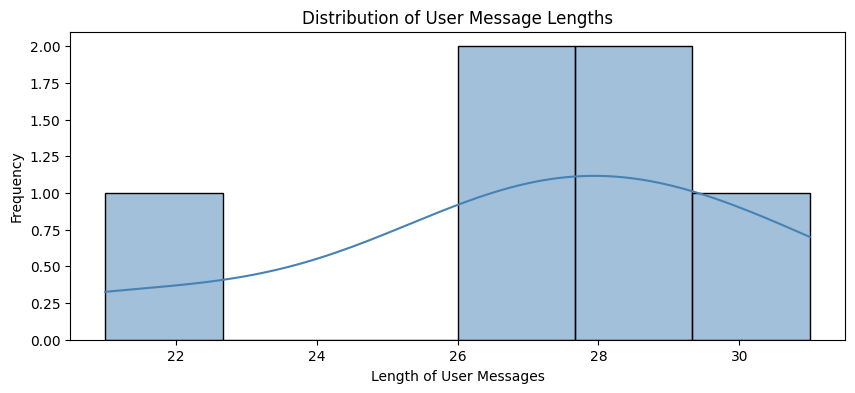

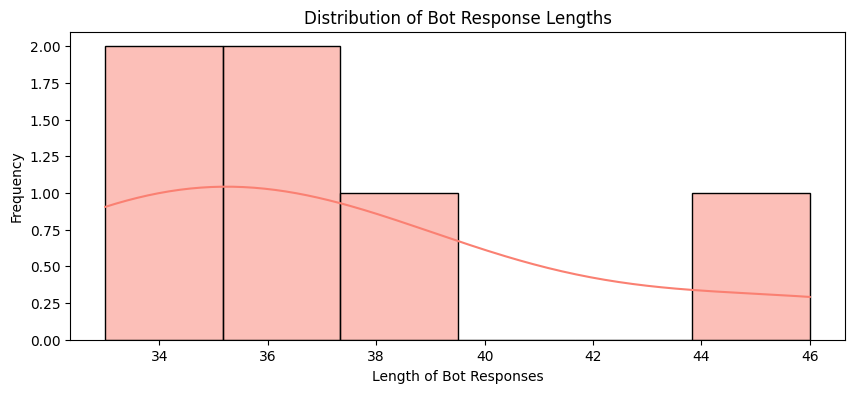

<ipython-input-7-8e8a68e04299>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


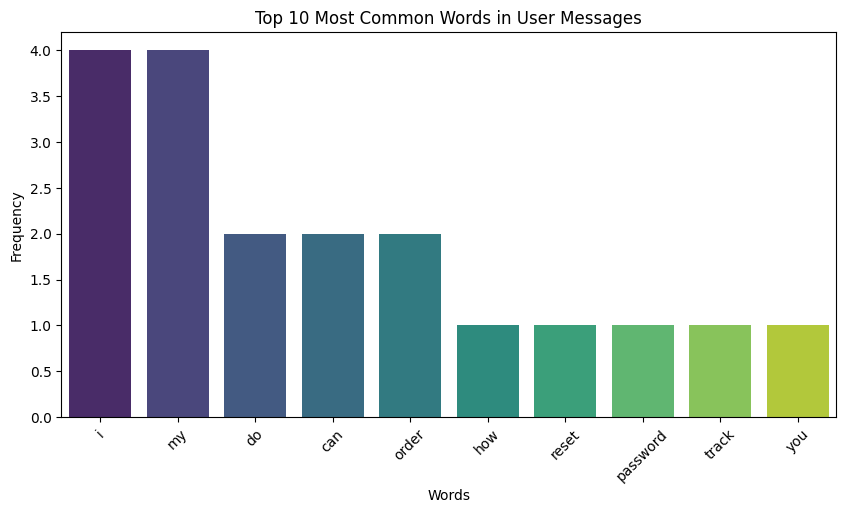

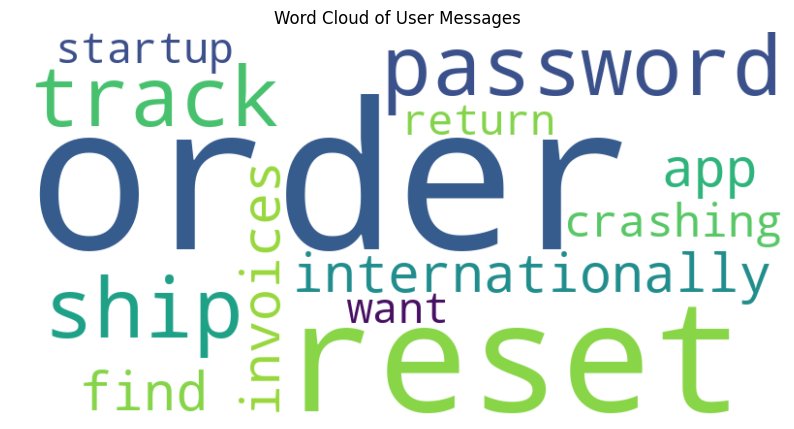

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Sample chatbot interaction data (in-memory)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "bot_response": "Click on 'Forgot Password' at login."},
    {"user_id": 102, "user_message": "Can I track my order?", "bot_response": "Yes, go to 'My Orders' > 'Track'."},
    {"user_id": 103, "user_message": "Do you ship internationally?", "bot_response": "Yes, we ship to select countries."},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "bot_response": "Invoices are available in 'My Account'."},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "bot_response": "Try reinstalling or contact support."},
    {"user_id": 106, "user_message": "I want to return my order.", "bot_response": "You can initiate a return from the order page."},
]

# Load into DataFrame
df = pd.DataFrame(data)

# Add length-based features
df["user_msg_len"] = df["user_message"].apply(len)
df["bot_resp_len"] = df["bot_response"].apply(len)

# 📊 1. Histogram of user message lengths
plt.figure(figsize=(10, 4))
sns.histplot(df["user_msg_len"], bins=6, kde=True, color='steelblue')
plt.title("Distribution of User Message Lengths")
plt.xlabel("Length of User Messages")
plt.ylabel("Frequency")
plt.show()

# 📊 2. Histogram of bot response lengths
plt.figure(figsize=(10, 4))
sns.histplot(df["bot_resp_len"], bins=6, kde=True, color='salmon')
plt.title("Distribution of Bot Response Lengths")
plt.xlabel("Length of Bot Responses")
plt.ylabel("Frequency")
plt.show()

# 🔤 3. Bar chart of most common words in user messages
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

all_words = []
df['user_message'].apply(lambda msg: all_words.extend(tokenize(msg)))
word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words in User Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# ☁️ 4. Word Cloud (optional, visual-only)
text_blob = ' '.join(df['user_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of User Messages")
plt.show()


 Identify Target and Features

In [ ]:
import pandas as pd

# Step 1: Simulated chatbot data (in-memory)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "bot_response": "Click on 'Forgot Password' at login."},
    {"user_id": 102, "user_message": "Can I track my order?", "bot_response": "Yes, go to 'My Orders' > 'Track'."},
    {"user_id": 103, "user_message": "Do you ship internationally?", "bot_response": "Yes, we ship to select countries."},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "bot_response": "Invoices are available in 'My Account'."},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "bot_response": "Try reinstalling or contact support."},
    {"user_id": 106, "user_message": "I want to return my order.", "bot_response": "You can initiate a return from the order page."},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Feature Engineering
df['user_msg_len'] = df['user_message'].apply(len)  # Feature: message length
df['user_msg_word_count'] = df['user_message'].apply(lambda x: len(x.split()))  # Feature: word count

# Step 4: Define Features and Target
features = df[['user_message', 'user_msg_len', 'user_msg_word_count']]  # Input features
target = df['bot_response']  # What we want to predict (the target)

# Display the results
print("✅ Input Features (X):\n")
print(features)

print("\n🎯 Target Variable (y):\n")
print(target)


✅ Input Features (X):

                      user_message  user_msg_len  user_msg_word_count
0      How do I reset my password?            27                    6
1            Can I track my order?            21                    5
2     Do you ship internationally?            28                    4
3    Where can I find my invoices?            29                    6
4  The app is crashing on startup!            31                    6
5       I want to return my order.            26                    6

🎯 Target Variable (y):

0              Click on 'Forgot Password' at login.
1                 Yes, go to 'My Orders' > 'Track'.
2                 Yes, we ship to select countries.
3           Invoices are available in 'My Account'.
4              Try reinstalling or contact support.
5    You can initiate a return from the order page.
Name: bot_response, dtype: object


Convert Categorical Columns to Numerical


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Simulated chatbot data with an "intent" column
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Convert categorical column 'intent' to numeric using LabelEncoder
le = LabelEncoder()
df['intent_encoded'] = le.fit_transform(df['intent'])

# Display mappings
intent_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("🎯 Intent Mapping (Label Encoding):")
print(intent_mapping)

# Optional: One-hot encoding (for use in models like logistic regression)
df_onehot = pd.get_dummies(df, columns=['intent'])

# Step 4: Show results
print("\n🔢 DataFrame with Encoded Intent:")
print(df[['user_message', 'intent', 'intent_encoded']])

print("\n🔢 One-Hot Encoded DataFrame:")
print(df_onehot.head())


🎯 Intent Mapping (Label Encoding):
{'billing': np.int64(0), 'order_tracking': np.int64(1), 'password_reset': np.int64(2), 'returns': np.int64(3), 'shipping_info': np.int64(4), 'technical_issue': np.int64(5)}

🔢 DataFrame with Encoded Intent:
                      user_message           intent  intent_encoded
0      How do I reset my password?   password_reset               2
1            Can I track my order?   order_tracking               1
2     Do you ship internationally?    shipping_info               4
3    Where can I find my invoices?          billing               0
4  The app is crashing on startup!  technical_issue               5
5       I want to return my order.          returns               3

🔢 One-Hot Encoded DataFrame:
   user_id                     user_message  intent_encoded  intent_billing  \
0      101      How do I reset my password?               2           False   
1      102            Can I track my order?               1           False   
2      103     

 One-Hot Encoding


In [ ]:
import pandas as pd

# Step 1: Simulated chatbot data with an "intent" column
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: One-Hot Encoding using pandas
df_onehot = pd.get_dummies(df, columns=['intent'], prefix='intent')

# Step 4: Display Results
print("🔢 One-Hot Encoded DataFrame:")
print(df_onehot)


🔢 One-Hot Encoded DataFrame:
   user_id                     user_message  intent_billing  \
0      101      How do I reset my password?           False   
1      102            Can I track my order?           False   
2      103     Do you ship internationally?           False   
3      104    Where can I find my invoices?            True   
4      105  The app is crashing on startup!           False   
5      106       I want to return my order.           False   

   intent_order_tracking  intent_password_reset  intent_returns  \
0                  False                   True           False   
1                   True                  False           False   
2                  False                  False           False   
3                  False                  False           False   
4                  False                  False           False   
5                  False                  False            True   

   intent_shipping_info  intent_technical_issue  
0        

 Feature Scaling


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Simulated chatbot data with numerical features
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset", "user_msg_len": 27, "user_msg_word_count": 5},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking", "user_msg_len": 25, "user_msg_word_count": 5},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info", "user_msg_len": 30, "user_msg_word_count": 4},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing", "user_msg_len": 34, "user_msg_word_count": 6},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue", "user_msg_len": 34, "user_msg_word_count": 6},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns", "user_msg_len": 28, "user_msg_word_count": 5},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Feature Scaling using StandardScaler (Standardization)
scaler = StandardScaler()

# Select numerical features for scaling (e.g., user message length and word count)
numerical_features = ['user_msg_len', 'user_msg_word_count']

# Apply scaling
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 4: Feature Scaling using MinMaxScaler (Normalization)
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the same features
df_normalized = df.copy()
df_normalized[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

# Display results
print("🔢 Standardized Data (using StandardScaler):")
print(df_scaled[['user_id', 'user_msg_len', 'user_msg_word_count']])

print("\n🔢 Normalized Data (using MinMaxScaler):")
print(df_normalized[['user_id', 'user_msg_len', 'user_msg_word_count']])


🔢 Standardized Data (using StandardScaler):
   user_id  user_msg_len  user_msg_word_count
0      101     -0.784465            -0.242536
1      102     -1.372813            -0.242536
2      103      0.098058            -1.697749
3      104      1.274755             1.212678
4      105      1.274755             1.212678
5      106     -0.490290            -0.242536

🔢 Normalized Data (using MinMaxScaler):
   user_id  user_msg_len  user_msg_word_count
0      101      0.222222                  0.5
1      102      0.000000                  0.5
2      103      0.555556                  0.0
3      104      1.000000                  1.0
4      105      1.000000                  1.0
5      106      0.333333                  0.5


Train-Test Split


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Simulated chatbot data
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Define Features (X) and Target (y)
X = df['user_message']  # Features: User Messages
y = df['intent']        # Target: Intent (what we want to predict)

# Step 4: Split the data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Display the results
print("Training Set (X_train):\n", X_train)
print("\nTraining Labels (y_train):\n", y_train)
print("\nTest Set (X_test):\n", X_test)
print("\nTest Labels (y_test):\n", y_test)


Training Set (X_train):
 5         I want to return my order.
2       Do you ship internationally?
4    The app is crashing on startup!
3      Where can I find my invoices?
Name: user_message, dtype: object

Training Labels (y_train):
 5            returns
2      shipping_info
4    technical_issue
3            billing
Name: intent, dtype: object

Test Set (X_test):
 0    How do I reset my password?
1          Can I track my order?
Name: user_message, dtype: object

Test Labels (y_test):
 0    password_reset
1    order_tracking
Name: intent, dtype: object


Model Building


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Simulated chatbot data
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Define Features (X) and Target (y)
X = df['user_message']  # Features: User Messages
y = df['intent']        # Target: Intent (what we want to predict)

# Step 4: Split the data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Text Preprocessing (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common stopwords like "the", "and"
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)        # Only transform the test data

# Step 6: Train a Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)  # Train the model using the TF-IDF vectors

# Step 7: Make Predictions
y_pred = model.predict(X_test_tfidf)

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.00%

Classification Report:
                precision    recall  f1-score   support

order_tracking       0.00      0.00      0.00       1.0
password_reset       0.00      0.00      0.00       1.0
       returns       0.00      0.00      0.00       0.0

      accuracy                           0.00       2.0
     macro avg       0.00      0.00      0.00       2.0
  weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Evaluation


Model Accuracy: 0.00%

Classification Report:
                precision    recall  f1-score   support

order_tracking       0.00      0.00      0.00       1.0
password_reset       0.00      0.00      0.00       1.0
       returns       0.00      0.00      0.00       0.0

      accuracy                           0.00       2.0
     macro avg       0.00      0.00      0.00       2.0
  weighted avg       0.00      0.00      0.00       2.0


Confusion Matrix:
[[0 0 1]
 [0 0 1]
 [0 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

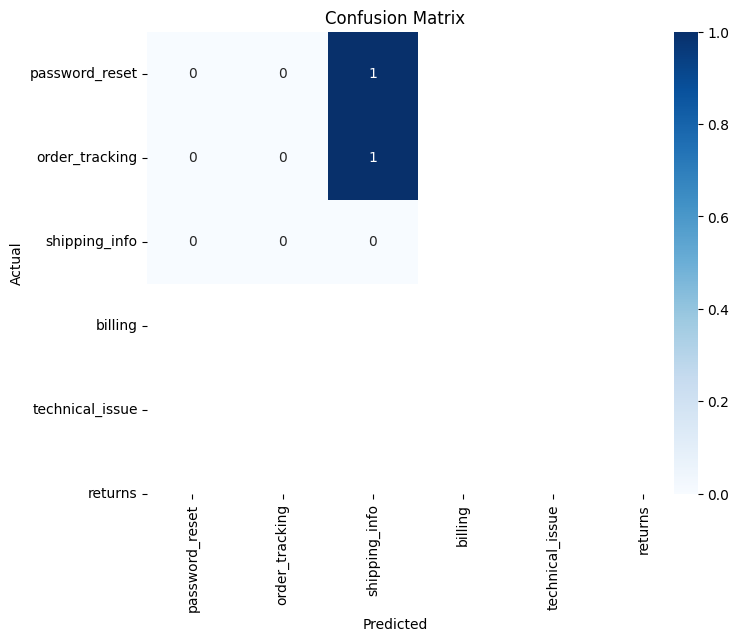

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Simulated chatbot data
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Define Features (X) and Target (y)
X = df['user_message']  # Features: User Messages
y = df['intent']        # Target: Intent (what we want to predict)

# Step 4: Split the data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Text Preprocessing (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common stopwords like "the", "and"
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)        # Only transform the test data

# Step 6: Train a Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)  # Train the model using the TF-IDF vectors

# Step 7: Make Predictions on the Test Set
y_pred = model.predict(X_test_tfidf)

# Step 8: Evaluation

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 Make Predictions from New Input


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 1: Simulated chatbot data (used for training the model)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Load into DataFrame
df = pd.DataFrame(data)

# Step 3: Define Features (X) and Target (y)
X = df['user_message']  # Features: User Messages
y = df['intent']        # Target: Intent (what we want to predict)

# Step 4: Split the data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Text Preprocessing (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common stopwords like "the", "and"
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)        # Only transform the test data

# Step 6: Train a Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)  # Train the model using the TF-IDF vectors

# Step 7: Make Predictions from New Input
def predict_intent(user_message):
    # Preprocess the user input message using the same vectorizer
    message_tfidf = vectorizer.transform([user_message])  # Transform the message to TF-IDF vector
    prediction = model.predict(message_tfidf)  # Predict the intent
    return prediction[0]

# Example New User Input
new_message = "I want to know how to track my order"

# Step 8: Make a prediction
predicted_intent = predict_intent(new_message)

print(f"User message: {new_message}")
print(f"Predicted intent: {predicted_intent}")


User message: I want to know how to track my order
Predicted intent: returns


 Convert to DataFrame and Encode


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Simulated chatbot data (used for converting to DataFrame)
data = [
    {"user_id": 101, "user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_id": 102, "user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_id": 103, "user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_id": 104, "user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_id": 105, "user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_id": 106, "user_message": "I want to return my order.", "intent": "returns"},
]

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Display the DataFrame to check the structure
print("Original DataFrame:")
print(df)

# Step 4: Encode the categorical target (intent) using LabelEncoder
label_encoder = LabelEncoder()
df['intent_encoded'] = label_encoder.fit_transform(df['intent'])

# Step 5: Display the DataFrame after encoding
print("\nDataFrame after encoding the 'intent' column:")
print(df)

# Optionally: To see the mapping of labels to intents
intent_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nIntent to Label Mapping:")
print(intent_mapping)


Original DataFrame:
   user_id                     user_message           intent
0      101      How do I reset my password?   password_reset
1      102            Can I track my order?   order_tracking
2      103     Do you ship internationally?    shipping_info
3      104    Where can I find my invoices?          billing
4      105  The app is crashing on startup!  technical_issue
5      106       I want to return my order.          returns

DataFrame after encoding the 'intent' column:
   user_id                     user_message           intent  intent_encoded
0      101      How do I reset my password?   password_reset               2
1      102            Can I track my order?   order_tracking               1
2      103     Do you ship internationally?    shipping_info               4
3      104    Where can I find my invoices?          billing               0
4      105  The app is crashing on startup!  technical_issue               5
5      106       I want to return my order. 

Predict the Final Grade


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Simulated chatbot performance data (used for predicting final grade)
data = [
    {"user_id": 101, "messages_sent": 5, "response_time": 2.5, "previous_grade": 85, "final_grade": 88},
    {"user_id": 102, "messages_sent": 7, "response_time": 3.0, "previous_grade": 78, "final_grade": 80},
    {"user_id": 103, "messages_sent": 6, "response_time": 1.5, "previous_grade": 90, "final_grade": 92},
    {"user_id": 104, "messages_sent": 4, "response_time": 4.0, "previous_grade": 70, "final_grade": 72},
    {"user_id": 105, "messages_sent": 8, "response_time": 2.2, "previous_grade": 75, "final_grade": 78},
    {"user_id": 106, "messages_sent": 9, "response_time": 2.8, "previous_grade": 82, "final_grade": 85},
]

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Define Features (X) and Target (y)
X = df[['messages_sent', 'response_time', 'previous_grade']]  # Features: Number of messages, response time, previous grade
y = df['final_grade']  # Target: Final grade

# Step 4: Split the data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model on the training data

# Step 6: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 8: Make Predictions from New Input (e.g., new user interaction)
def predict_final_grade(messages_sent, response_time, previous_grade):
    prediction = model.predict([[messages_sent, response_time, previous_grade]])
    return prediction[0]

# Example New Input
new_input = (6, 2.5, 85)  # Example: 6 messages sent, response time 2.5 hours, previous grade 85
predicted_grade = predict_final_grade(*new_input)

print(f"Predicted Final Grade: {predicted_grade:.2f}")


Root Mean Squared Error (RMSE): 0.92
Predicted Final Grade: 87.11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Deployment-Building an Interactive App


In [ ]:
from flask import Flask, render_template, request
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Step 1: Create a simple Flask app
app = Flask(__name__)

# Step 2: Simulated chatbot training data (for demonstration purposes)
data = [
    {"user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_message": "I want to return my order.", "intent": "returns"},
]

# Step 3: Prepare the dataset and train the chatbot model
X = [entry['user_message'] for entry in data]  # Features: user messages
y = [entry['intent'] for entry in data]        # Target: intents

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_tfidf, y)

# Step 4: Function to predict the intent of new messages
def predict_intent(user_message):
    message_tfidf = vectorizer.transform([user_message])  # Transform the input to TF-IDF
    prediction = model.predict(message_tfidf)  # Predict the intent
    return prediction[0]

# Step 5: Define routes for the Flask app
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/get', methods=['GET', 'POST'])
def get_response():
    user_message = request.args.get('msg')  # Get user message from the URL query parameter
    intent = predict_intent(user_message)  # Get predicted intent from the model
    response = f"Chatbot predicts the intent: {intent}"  # The chatbot response
    return response

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


 Create a Prediction Function


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Sample data: List of user queries and their corresponding intents (labels)
data = [
    {"user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_message": "I want to return my order.", "intent": "returns"},
    {"user_message": "How do I change my shipping address?", "intent": "shipping_info"},
    {"user_message": "Can I get a refund?", "intent": "returns"},
    {"user_message": "My password is not working", "intent": "password_reset"},
]

# Step 1: Prepare the dataset
X = [entry['user_message'] for entry in data]  # Features: user messages
y = [entry['intent'] for entry in data]        # Target: intents

# Step 2: Vectorize the text data (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize the vectorizer
X_tfidf = vectorizer.fit_transform(X)  # Apply the vectorizer to the user messages

# Step 3: Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_tfidf, y)  # Train the model using the transformed data

# Step 4: Create a prediction function
def predict_intent(user_message):
    """
    Predict the intent of a user message using the trained model.
    :param user_message: The message from the user.
    :return: The predicted intent.
    """
    # Preprocess the user message by transforming it into TF-IDF features
    user_message_tfidf = vectorizer.transform([user_message])

    # Predict the intent
    intent_prediction = model.predict(user_message_tfidf)[0]

    # Return the predicted intent
    return intent_prediction

# Step 5: Test the prediction function
def get_chatbot_response(user_message):
    """
    Get a response from the chatbot based on the predicted intent.
    :param user_message: The message from the user.
    :return: The chatbot's response based on the intent.
    """
    predicted_intent = predict_intent(user_message)

    # Define sample responses based on the predicted intent
    responses = {
        "password_reset": "To reset your password, go to the 'Forgot Password' page and follow the instructions.",
        "order_tracking": "You can track your order by logging into your account and visiting the 'My Orders' section.",
        "shipping_info": "We do offer international shipping. You can check the available countries on our Shipping Info page.",
        "billing": "Your invoices can be found under the 'Billing' section in your account settings.",
        "technical_issue": "Sorry to hear you're facing technical issues. Please try restarting the app. If the issue persists, contact support.",
        "returns": "To return an item, visit the 'Returns' section in your account and follow the return instructions."
    }

    # Return the response based on the predicted intent
    return responses.get(predicted_intent, "Sorry, I didn't understand that. Can you please clarify?")

# Example Usage
if __name__ == '__main__':
    # Test the function with some sample user inputs
    test_messages = [
        "How can I reset my password?",
        "I want to track my order",
        "Do you offer international shipping?",
        "How do I return an item?",
        "The app is not working, help!"
    ]

    for message in test_messages:
        print(f"User: {message}")
        response = get_chatbot_response(message)
        print(f"Bot: {response}\n")


User: How can I reset my password?
Bot: To reset your password, go to the 'Forgot Password' page and follow the instructions.

User: I want to track my order
Bot: To return an item, visit the 'Returns' section in your account and follow the return instructions.

User: Do you offer international shipping?
Bot: We do offer international shipping. You can check the available countries on our Shipping Info page.

User: How do I return an item?
Bot: To return an item, visit the 'Returns' section in your account and follow the return instructions.

User: The app is not working, help!
Bot: To reset your password, go to the 'Forgot Password' page and follow the instructions.



 Create the Gradio Interface


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Sample data
data = [
    {"user_message": "How do I reset my password?", "intent": "password_reset"},
    {"user_message": "Can I track my order?", "intent": "order_tracking"},
    {"user_message": "Do you ship internationally?", "intent": "shipping_info"},
    {"user_message": "Where can I find my invoices?", "intent": "billing"},
    {"user_message": "The app is crashing on startup!", "intent": "technical_issue"},
    {"user_message": "I want to return my order.", "intent": "returns"},
    {"user_message": "How do I change my shipping address?", "intent": "shipping_info"},
    {"user_message": "Can I get a refund?", "intent": "returns"},
    {"user_message": "My password is not working", "intent": "password_reset"},
]

# Prepare the dataset
X = [entry['user_message'] for entry in data]  # Features: user messages
y = [entry['intent'] for entry in data]        # Target: intents

# Vectorize the text data (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)  # Transform user messages into numerical data

# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_tfidf, y)  # Fit the model with the data

# Prediction function
def predict_intent(user_message):
    """
    Predict the intent of a user message.
    :param user_message: The message from the user.
    :return: The predicted intent.
    """
    user_message_tfidf = vectorizer.transform([user_message])  # Convert message to TF-IDF
    intent_prediction = model.predict(user_message_tfidf)[0]  # Get the predicted intent
    return intent_prediction

# Generate a response based on the predicted intent
def get_chatbot_response(user_message):
    """
    Generate a response based on the predicted intent of a user message.
    :param user_message: The message from the user.
    :return: The chatbot response.
    """
    predicted_intent = predict_intent(user_message)

    # Response based on predicted intent
    responses = {
        "password_reset": "To reset your password, go to the 'Forgot Password' page and follow the instructions.",
        "order_tracking": "You can track your order by logging into your account and visiting the 'My Orders' section.",
        "shipping_info": "We do offer international shipping. You can check the available countries on our Shipping Info page.",
        "billing": "Your invoices can be found under the 'Billing' section in your account settings.",
        "technical_issue": "Sorry to hear you're facing technical issues. Please try restarting the app. If the issue persists, contact support.",
        "returns": "To return an item, visit the 'Returns' section in your account and follow the return instructions."
    }

    return responses.get(predicted_intent, "Sorry, I didn't understand that. Can you please clarify?")
